In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
helper = imp.load_source('helpfunction','/home/tmettler/Desktop/uBoone/do_plots/helpfunction.py')
globale = imp.load_source('globale','/home/tmettler/Desktop/uBoone/do_plots/globale.py')
#import /home/tmettler/Desktop/uBoone/do_plots/helpfunction as helper
import collections
NuCC = imp.load_source('NuCC_function','/home/tmettler/Desktop/uBoone/do_plots/NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function','/home/tmettler/Desktop/uBoone/do_plots/NuCCWeight_function.py')

Welcome to JupyROOT 6.10/08


In [2]:
#!jupyter nbconvert --to script numuCCana_reweight_genie_all.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# CRTinBNB tagger, Overlay or MC

In [4]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'detsys/' 
outputdir_png, outputdir_root = NuCC.prepareOutput(outputdir)

#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
filename_overlay = 'NuCCana_overlay_V26_weight.root'
#filename_overlay = 'NuCCana_overlay_v25_weighted_all.root'
filename_data = 'NuCCana_data_V22.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'

filename_detsys = 'detector_variation/NuCCana_overlay_LYdown.root'
    
tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)
data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)

#V25 files
pot_data =     8.649e+18  # best with tor875
data_trigger = 1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''

#filename_detsys = filename_detsys+'out33.root'
detsys = ROOT.TChain(tree_name+ "/event","event")
detsys.Add( inputdir + filename_detsys)

pot_detsys = NuCC.getPOT(inputdir,filename_detsys,tree_name)

pot_overlay = pot_overlay
sample = [data,ext,overlay,dirt,detsys]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0,detsys:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt',detsys:'detsys'}
scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
scale_detsys = pot_data/pot_detsys
scale[detsys] = scale_detsys
print 'Detsys POT:', pot_detsys, ' Scale: ', scale_detsys
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	989745
Data: Number of Entries:	33178
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		8.649e+18
Ext:		0
Overlay:	1.24025430537e+21
Dirt:		1.25019694173e+20

Detsys POT: 1.20299362258e+20  Scale:  0.071895642983
Scalefactors: 
Data:		1.0
Ext:		0.0976176954382
Overlay:	0.00697356982562
Dirt:		0.0691811002835


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
if 1:
    filename_overlay = filename_overlay+'out33wG.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out33.root'
    filename_ext = filename_ext+'out33.root'
    filename_dirt = filename_dirt+'out33.root'
    
    tree_name = 't_out'
    
    filename_detsys = filename_detsys+'out33.root'
    detsys_out = ROOT.TChain(tree_name,"t_out")
    detsys_out.Add( inputdir + filename_detsys)
    print "Detsys: Number of Entries:\t", detsys_out.GetEntries()

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out, detsys_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0, detsys_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt',detsys_out:'detsys'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]
    scale_out[detsys_out] = scale_detsys
    

Detsys: Number of Entries:	95716
Overlay: Number of Entries:	989714
Data: Number of Entries:	33177
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40807



In [ ]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40
##############################################

In [7]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    #x.SetAlias('muon','(track_key == key_muon)')
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [8]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')
    #x.SetAlias('muon','(key_muprotratio==track_key)')
    
num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)


In [9]:
# Load the global variables for access of functions
#NuCC.loadGlobal_detsys(data,ext,dirt,overlay,detsys,data_out,ext_out,dirt_out,overlay_out,detsys_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root)
#NuCC.printGlobal()

In [10]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",400,300)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

detsys.SetAlias("track_end_uncontained",track_end_uncontained)
detsys_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<0.8 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<0.8 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<0.8 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<0.8 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")

detsys.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
detsys_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

detsys.SetAlias("crt_tom_cut",crt_tom_cut)
detsys_out.SetAlias("crt_tom_cut",crt_tom_cut)


True

In [12]:
NuCC.loadGlobal_detsys(data,ext,dirt,overlay,detsys,data_out,ext_out,dirt_out,overlay_out,detsys_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [13]:
def make_stacked_histo_detsys(cut,variable,title,xstart,xend,xbins,file_name):
    h_data_func = ROOT.TH1F("h_data_func",title,xbins,xstart,xend)
    h_ext_func = ROOT.TH1F("h_ext_func",title,xbins,xstart,xend)
    h_dirt_func = ROOT.TH1F("h_dirt_func",title,xbins,xstart,xend)
    h_overlay_func = {}
    for x in globale.overlay_signals:
        h_overlay_func[x] = ROOT.TH1F(x,title,xbins,xstart,xend)
    variable = variable
    globale.data_out.Draw(variable+'>>h_data_func',cut,'')
    globale.ext_out.Draw(variable+'>>h_ext_func',cut,'')
    globale.dirt_out.Draw(variable+'>>h_dirt_func',cut,'')
    #overlay.Draw('TimFla>>h_overlay',cut,'')
    #h_data_func.SetXTitle(title)
    h_data_func.SetYTitle("Entries per bin")
    cut = cut +' && '
    for x in globale.overlay_signals:
        histo = x
        globale.detsys_out.Draw(variable+'>>'+histo,cut+x,'')
    #legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT
    legend = ROOT.TLegend(0.75,0.65,0.9,0.9); #LEGEND RIGHT
    legend.AddEntry(h_data_func,"data","lep");
    legend.AddEntry(h_ext_func,"ext","f");
    legend.AddEntry(h_dirt_func,"dirt","f");
    for x in globale.overlay_signals:
        legend.AddEntry(h_overlay_func[x],x,"f");

    hs = ROOT.THStack("hs","");
    h_ext_func.SetFillColor(2)
    h_ext_func.SetLineColor(1)
    h_dirt_func.SetFillColor(42)
    h_dirt_func.SetLineColor(1)
    h_data_func.SetLineWidth(1)
    h_data_func.Sumw2()	
    h_data_func.Scale(globale.scale[globale.data])
    h_ext_func.Sumw2()	
    h_ext_func.Scale(globale.scale[globale.ext])
    h_dirt_func.Sumw2()	
    h_dirt_func.Scale(globale.scale[globale.dirt])
    hs.Add(h_ext_func)
    hs.Add(h_dirt_func)
    mc_events = h_dirt_func.GetEntries()*globale.scale[globale.dirt]
    for i,x in enumerate(globale.overlay_signals):
        h_overlay_func[x].Sumw2()
        #h_overlay_func[x].Scale(globale.scale[globale.detsys_out])
        h_overlay_func[x].Scale(scale_detsys)
        h_overlay_func[x].SetFillColor((2*i+11))
        h_overlay_func[x].SetLineColor((2*i+11))
        h_overlay_func[x].SetLineColor(1)
        #print 'MC entries, scaled: ', h_overlay_func[x].GetEntries()*globale.scale[globale.detsys_out]
        print 'MC entries, scaled: ', h_overlay_func[x].GetEntries()*scale_detsys
        #mc_events = mc_events+h_overlay_func[x].GetEntries()*globale.scale[globale.detsys_out]
        mc_events = mc_events+h_overlay_func[x].GetEntries()*scale_detsys
        hs.Add(h_overlay_func[x])
    data_events = h_data_func.GetEntries()*globale.scale[globale.data]
    ext_events = h_ext_func.GetEntries()*globale.scale[globale.ext]
    normalization = (data_events- ext_events)/(mc_events+0.0000001)
    print 'Normalization (data-ext)/mc = ', normalization
    print 'Normalization (data)/(mc +ext) = ', (data_events)/(mc_events+ext_events+0.0000001)
    
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.18)
    c1.SetBottomMargin(0.14)
    c1.cd()
    pad1 = ROOT.TPad('pad1','pad1',0,0.3,1,1)
    pad1.SetGrid(1)
    pad1.Draw()
    pad1.cd()
    h_data_func.SetMinimum(0)
    h_data_func.Draw('E')
    legend.Draw();
    hs.Draw('same hist')
    h_data_func.Draw('E same')

    c1.cd()
    pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
    pad2.SetGrid(1)
    pad2.Draw()
    pad2.cd()
    h_tot_func = h_ext_func.Clone()
    h_div_func = h_data_func.Clone()
    h_tot_func.Add(h_dirt_func)
    for i,x in enumerate(globale.overlay_signals):
        h_tot_func.Add(h_overlay_func[x])
    h_div_func.Divide(h_tot_func)
    h_div_func.SetMinimum(0.5)
    h_div_func.SetMaximum(1.5)
    h_div_func.SetTitle('')
    h_div_func.SetYTitle('Data/(Ext+MC)')
    h_div_func.GetYaxis().SetTitleSize(0.08)
    h_div_func.GetYaxis().SetTitleOffset(0.3)
    h_div_func.GetYaxis().SetLabelSize(0.06)
    h_div_func.SetXTitle(title)
    h_div_func.GetXaxis().SetTitleSize(0.1)
    h_div_func.GetXaxis().SetTitleOffset(0.4)
    h_div_func.Draw()
    c1.Draw()
    c1.SaveAs(globale.outputdir_png+ file_name + ".png")
    c1.SaveAs(globale.outputdir_root+ file_name + ".root")
    #img = mpimg.imread(globale.outputdir_png+ file_name + ".png")
    #plt.rcParams['figure.figsize'] = [16, 12]
    #plt.imshow(img)
    #plt.show()
    return


In [14]:
print detsys_out.GetEntries('crt_tom_cut')

39224


Normalization (data)/(mc +ext) =  0.977012718775


'\nmean, std, bin_entry = NuCC_w.calc_genie_systematic(cut,"cos(TrackTheta)",-1,1,20,100)\nnp.save(outputdir+\'theta_20bin_all\',std)\nnp.save(outputdir+\'theta_20bin_all_binentry\',bin_entry)\nmean, std, bin_entry = NuCC_w.calc_genie_systematic(cut,"TrackMomMCS_mom",0,1.5,20,100)\nnp.save(outputdir+\'MCS_20bin_10\',std)\nnp.save(outputdir+\'MCS_20bin_10_binentry\',bin_entry)\nmean, std, bin_entry = NuCC_w.calc_genie_systematic(cut,"TrackPhi",3.141,3.141,20,100)\nnp.save(outputdir+\'Phi_20bin_10\',std)\nnp.save(outputdir+\'Phi_20bin_10_binentry\',bin_entry)\nmean, std, bin_entry = NuCC_w.calc_genie_systematic(cut,"Nu_Vx_sce",-10,270,20,100)\nnp.save(outputdir+\'Nux_20bin_10\',std)\nnp.save(outputdir+\'Nux_20bin_10_binentry\',bin_entry)\nmean, std, bin_entry = NuCC_w.calc_genie_systematic(cut,"Nu_Vy_sce",-120,120,20,100)\nnp.save(outputdir+\'Nuy_20bin_10\',std)\nnp.save(outputdir+\'Nuy_20bin_10_binentry\',bin_entry)\nmean, std, bin_entry = NuCC_w.calc_genie_systematic(cut,"Nu_Vz_sce",-5

Warning in <TROOT::Append>: Replacing existing TH1: h_ext_func (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_dirt_func (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: numu_lowpur (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: numu_other (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: numu_nomu (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: numu_ov (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: numu_signal (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: numu_nc (Potential memory leak).
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/detsys//png/costhetaw_weight.png has been created
Info in <

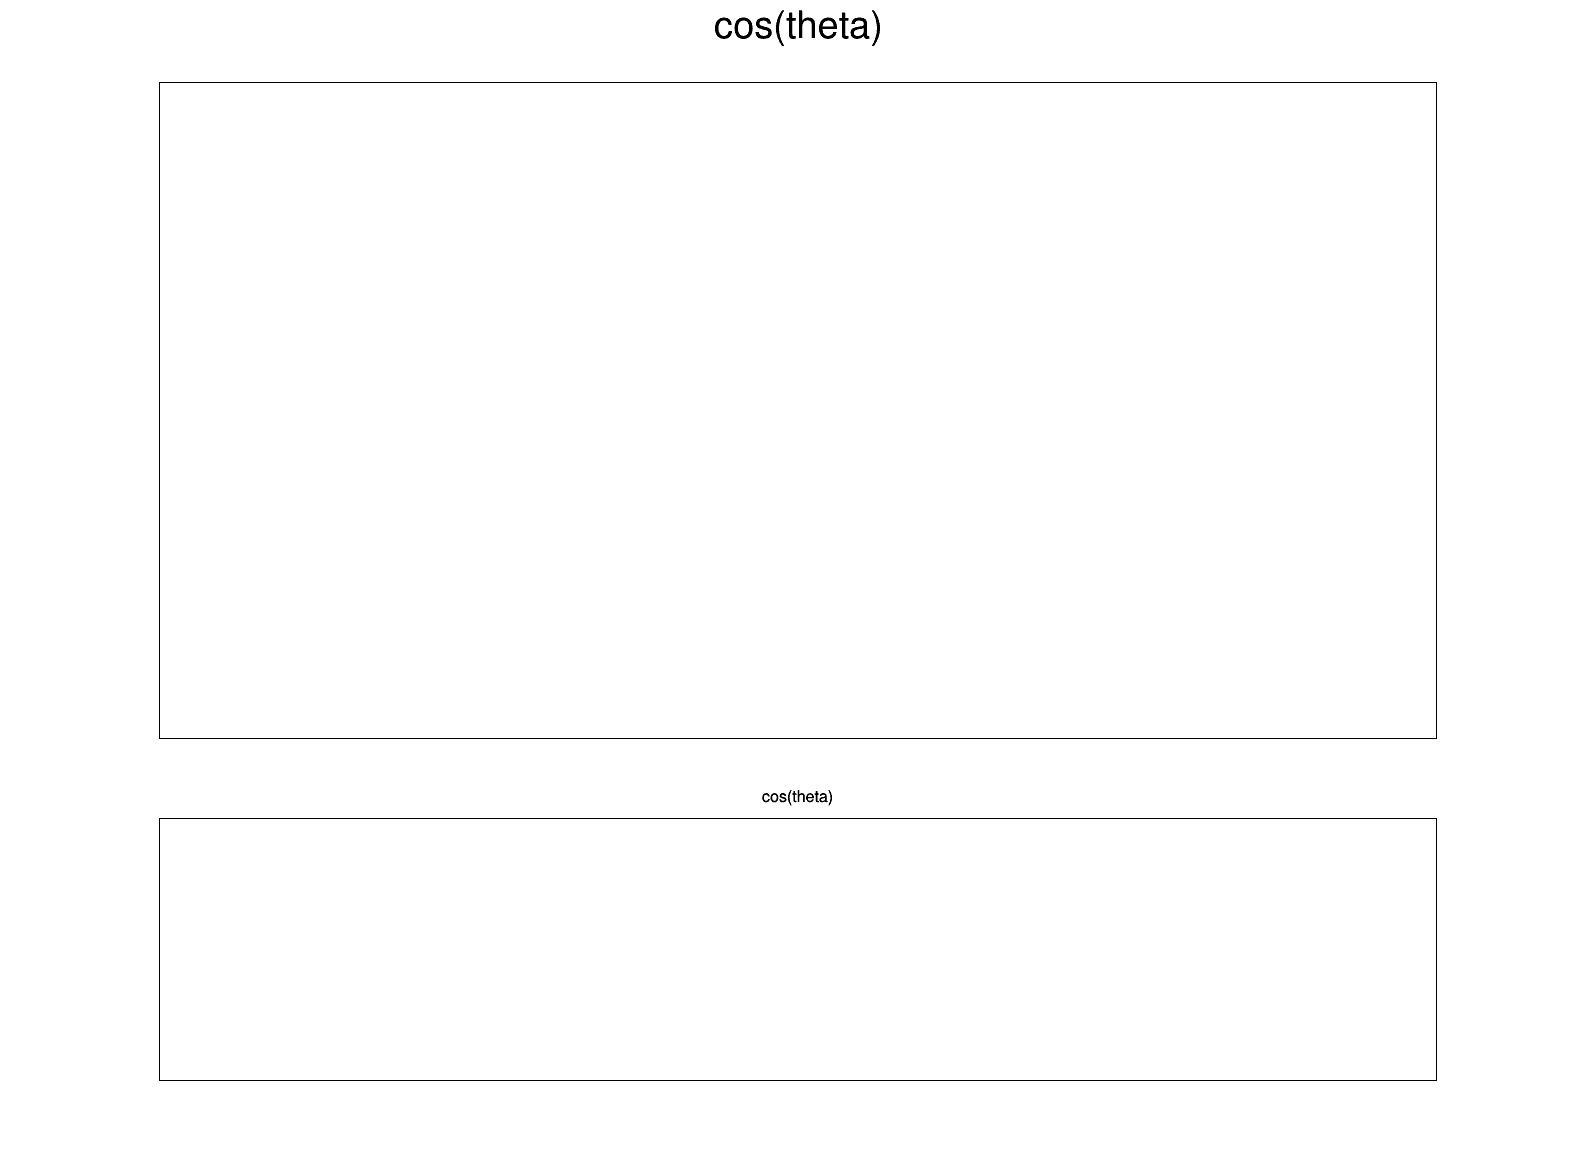

In [20]:
#NuCC_w = imp.load_source('NuCCWeight_function','/home/tmettler/Desktop/uBoone/do_plots/NuCCWeight_function.py')

cut = 'fidVol && muon'
cut = 'NuScore>0.1'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_LyDown'
#make_stacked_histo_detsys(cut + ' && TrackTheta!=-9','cos(TrackTheta)','cos(theta)',-1,1,20,'costhetaw'+name)
name = 'noweight'
#NuCC.make_stacked_histo_plot_out(cut + ' && TrackTheta!=-9','cos(TrackTheta)','cos(theta)',-1,1,20,'costhetaw'+name)
name = '_weight'
NuCC_w.make_stacked_histo_weightV2(cut + ' && TrackTheta!=-9','cos(TrackTheta)','EventWeight','cos(theta)',-1,1,20,'costhetaw'+name,'left')

#cut = cut+'&& !(numu_signal)'
'''
mean, std, bin_entry = NuCC_w.calc_genie_systematic(cut,"cos(TrackTheta)",-1,1,20,100)
np.save(outputdir+'theta_20bin_all',std)
np.save(outputdir+'theta_20bin_all_binentry',bin_entry)
mean, std, bin_entry = NuCC_w.calc_genie_systematic(cut,"TrackMomMCS_mom",0,1.5,20,100)
np.save(outputdir+'MCS_20bin_10',std)
np.save(outputdir+'MCS_20bin_10_binentry',bin_entry)
mean, std, bin_entry = NuCC_w.calc_genie_systematic(cut,"TrackPhi",3.141,3.141,20,100)
np.save(outputdir+'Phi_20bin_10',std)
np.save(outputdir+'Phi_20bin_10_binentry',bin_entry)
mean, std, bin_entry = NuCC_w.calc_genie_systematic(cut,"Nu_Vx_sce",-10,270,20,100)
np.save(outputdir+'Nux_20bin_10',std)
np.save(outputdir+'Nux_20bin_10_binentry',bin_entry)
mean, std, bin_entry = NuCC_w.calc_genie_systematic(cut,"Nu_Vy_sce",-120,120,20,100)
np.save(outputdir+'Nuy_20bin_10',std)
np.save(outputdir+'Nuy_20bin_10_binentry',bin_entry)
mean, std, bin_entry = NuCC_w.calc_genie_systematic(cut,"Nu_Vz_sce",-50,1050,20,100)
np.save(outputdir+'Nuz_20bin_10',std)
np.save(outputdir+'Nuz_20bin_10_binentry',bin_entry)
'''

In [16]:
'''
std_all = {}
std_all[0] = np.load(outputdir+'theta_20bin_all.npy')
std_all[1] = np.load(outputdir+'MCS_20bin_10.npy')
std_all[2] = np.load(outputdir+'Phi_20bin_10.npy')
std_all[3] = np.load(outputdir+'Nux_20bin_10.npy')
std_all[4] = np.load(outputdir+'Nuy_20bin_10.npy')
std_all[5] = np.load(outputdir+'Nuz_20bin_10.npy')
'''

"\nstd_all = {}\nstd_all[0] = np.load(outputdir+'theta_20bin_all.npy')\nstd_all[1] = np.load(outputdir+'MCS_20bin_10.npy')\nstd_all[2] = np.load(outputdir+'Phi_20bin_10.npy')\nstd_all[3] = np.load(outputdir+'Nux_20bin_10.npy')\nstd_all[4] = np.load(outputdir+'Nuy_20bin_10.npy')\nstd_all[5] = np.load(outputdir+'Nuz_20bin_10.npy')\n"

In [17]:
for j in range(len(std_all)):
    xbin = 20
    summe = 0.0
    for i in range(xbin):
        summe = summe + std_all[j][i]*std_all[j][i]
    print 'variable: ',j
    print math.sqrt(summe)*globale.scale[globale.overlay]/(1446.0)*100,'%'

NameError: name 'std_all' is not defined

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_muon_cut'
NuCC_w.make_stacked_histo_sys(cut + ' && TrackTheta!=-9','cos(TrackTheta)','EventWeight','cos(theta)',-1,1,20,'costhetaw'+name,'left',std_all[0])
NuCC_w.make_stacked_histo_sys(cut + ' && 1','TrackMomMCS_mom','EventWeight','TrackMomMCS_mom',0,1.5,20,'TrackMomMCS_mom'+name,'right',std_all[1])
NuCC_w.make_stacked_histo_sys(cut + ' && TrackTheta!=-9','TrackPhi','EventWeight','Track Phi',-3.141,3.141,20,'phi'+name,'left',std_all[2])

NuCC_w.make_stacked_histo_sys(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name,'right',std_all[3])
NuCC_w.make_stacked_histo_sys(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name,'right',std_all[4])
NuCC_w.make_stacked_histo_sys(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name,'right',std_all[5])
